In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use("dark_background")

mpl.rcParams["axes.unicode_minus"] = False

In [2]:
train = pd.read_csv("./bike/train.csv", parse_dates = ["datetime"])
train.shape

(10886, 12)

In [3]:
test = pd.read_csv("./bike/test.csv", parse_dates = ["datetime"])
test.shape

(6493, 9)

In [4]:
train["year"] = train["datetime"].apply(lambda x : x.year)
train["month"] = train["datetime"].apply(lambda x : x.month)
train["hour"] = train["datetime"].apply(lambda x : x.hour)
train["dayofweek"] = train["datetime"].apply(lambda x : x.dayofweek)
print(train.shape)
train.head()

(10886, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [5]:
test["year"] = test["datetime"].apply(lambda x : x.year)
test["month"] = test["datetime"].apply(lambda x : x.month)
test["hour"] = test["datetime"].apply(lambda x : x.hour)
test["dayofweek"] = test["datetime"].apply(lambda x : x.dayofweek)
print(test.shape)
test.head()

(6493, 13)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [6]:
categorical_feature_names = ["season", "holiday", "workingday", "weather", "dayofweek", "month", "year", "hour"]
for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [7]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "year", "hour", "dayofweek", "holiday", "workingday"]
X_train = train[feature_names]
print(X_train.shape)
X_test = test[feature_names]
print(X_test.shape)

(10886, 10)
(6493, 10)


In [8]:
X_train.head()

,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [9]:
X_test.head()

,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [10]:
label_name = "count"
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [11]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [12]:
# linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category = DeprecationWarning)

lModel = LinearRegression()

y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

preds = lModel.predict(X_train)
print("RMSLE value for linear regression : {:.6f}".format(rmsle(np.exp(y_train_log), np.exp(preds))))

RMSLE value for linear regression : 0.980370


In [13]:
from sklearn.metrics import make_scorer
ridge_m_ = Ridge()
ridge_params_ = {"max_iter" : [3000], "alpha" : [0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
rmsle_scorer = make_scorer(rmsle, greater_is_better = False)
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, scoring = rmsle_scorer, cv = 5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit(X_train, y_train_log)
preds = grid_ridge_m.predict(X_train)
print(grid_ridge_m.best_params_)
print("RMSLE value for ridge regression : {:.6f}".format(rmsle(np.exp(y_train_log), np.exp(preds))))

{'alpha': 0.01, 'max_iter': 3000}
RMSLE value for ridge regression : 0.980370


In [14]:
df = pd.DataFrame(grid_ridge_m.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028723,0.006804,0.007182,0.001598,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-0.269563,-0.208115,-0.253182,-0.222773,-0.207235,-0.232177,0.025015,1
1,0.023535,0.002719,0.007180,0.000747,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-0.269565,-0.208115,-0.253182,-0.222773,-0.207234,-0.232177,0.025016,2
2,0.023537,0.001739,0.008178,0.001595,1,3000,"{'alpha': 1, 'max_iter': 3000}",-0.269576,-0.208120,-0.253181,-0.222769,-0.207231,-0.232179,0.025019,3
3,0.021941,0.001893,0.008977,0.000630,2,3000,"{'alpha': 2, 'max_iter': 3000}",-0.269589,-0.208125,-0.253180,-0.222765,-0.207227,-0.232181,0.025023,4
4,0.023937,0.003623,0.008775,0.000399,3,3000,"{'alpha': 3, 'max_iter': 3000}",-0.269602,-0.208130,-0.253179,-0.222761,-0.207223,-0.232182,0.025026,5


In [15]:
df["alpha"] = df["params"].apply(lambda x : x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x : -x)
df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.232177
1,0.10,0.232177
2,1.00,0.232179
3,2.00,0.232181
4,3.00,0.232182


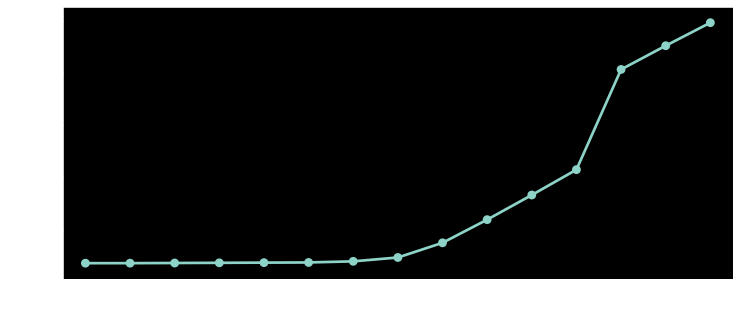

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
plt.xticks(rotation = 30, ha = "right")
sns.pointplot(data = df, x = "alpha", y = "rmsle", ax = ax)

In [17]:
lasso_m_ = Lasso()

alpha = 1 / np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {"max_iter" : [3000], "alpha" : alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_, scoring = rmsle_scorer, cv = 5)
grid_lasso_m.fit(X_train, y_train_log)
preds = grid_lasso_m.predict(X_train)
print(grid_lasso_m.best_params_)
print("RMSLE value for lasso regression : {0:.6f}".format(rmsle(np.exp(y_train_log), np.exp(preds))))
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x : x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x : -x)

df[["alpha", "rmsle"]].head()

{'alpha': 0.001, 'max_iter': 3000}
RMSLE value for lasso regression : 0.980374


,alpha,rmsle
0,10.000000,0.317354
1,1.000000,0.251982
2,0.500000,0.247870
3,0.333333,0.246759
4,0.250000,0.246259


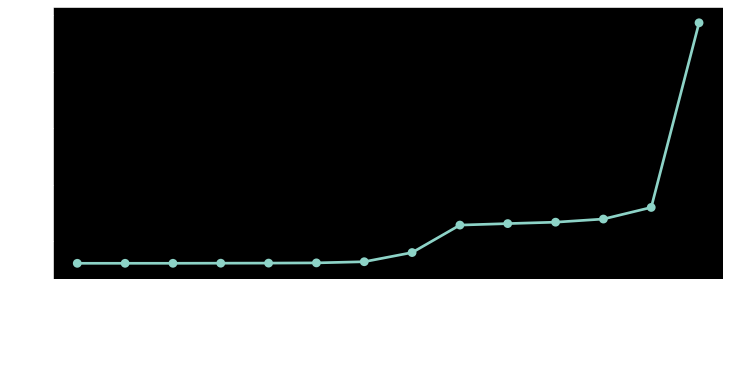

In [18]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)
preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds))
print("RMSLE value for random forest : {0:.6f}".format(score))

RMSLE value for random forest : 0.106734


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds))
print("RMSLE value for Gradient Boost : {0:.6f}".format(score))

RMSLE value for Gradient Boost : 0.213574


In [28]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=4000)
y_train_log = np.log1p(y_train)
lgb.fit(X_train, y_train_log)
preds = lgb.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds))
print("RMSLE value for LightGBM:{:0.6f}".format(score))

RMSLE value for LightGBM:0.045881


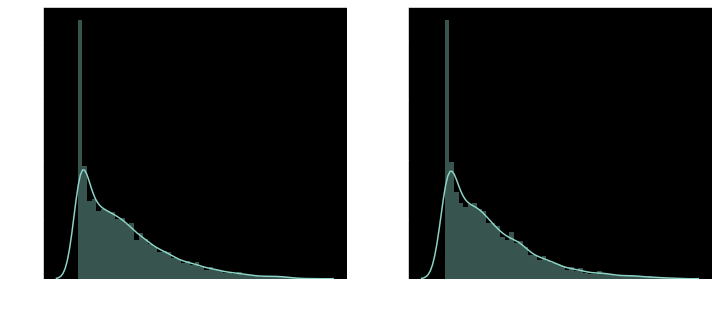

In [29]:
predsTest = lgb.predict(X_test)
fig,(ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)
sns.distplot(y_train, ax = ax1, bins = 50)
sns.distplot(np.exp(predsTest), ax = ax2, bins = 50)
plt.show()

In [30]:
submission = pd.read_csv("./bike/sampleSubmission.csv")
submission["count"] = np.exp(predsTest)
print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.702513
1,2011-01-20 01:00:00,5.157171
2,2011-01-20 02:00:00,4.187531
3,2011-01-20 03:00:00,5.213037
4,2011-01-20 04:00:00,1.868470


In [31]:
submission.to_csv("./Score_{0:.5f}_submission.csv".format(score), index = False)

In [34]:
ranking = (286 / 3242) * 100
print(ranking)
#대략 상위 8% 성적

8.821714990746452
